<a href="https://colab.research.google.com/github/maurya-anuj/Eip4/blob/master/Assignment4/Assignment4B/GRADcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2
from keras.models import load_model
from keras import backend as K


##################################
# Ignore WARNINGS
# import os
# import tensorflow as tf
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

########################

# model = VGG16(weights="imagenet")
model = load_model('/content/cifar10_ResNet20v1_model.032.h5')
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


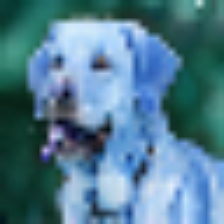

dog1.JPG = dog


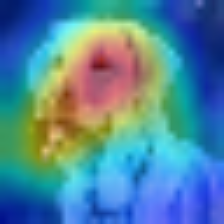

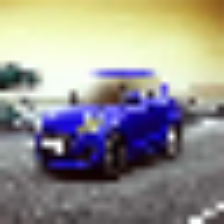

car1.JPG = automobile


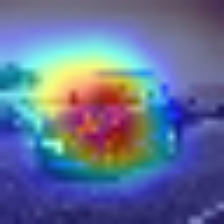

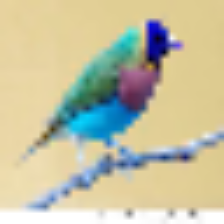

bird1.JPG = bird


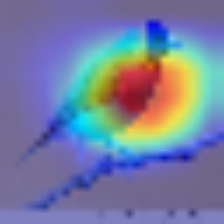

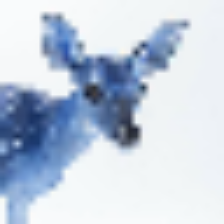

deer1.JPG = deer


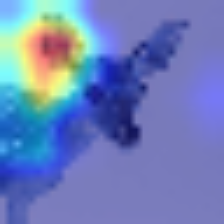

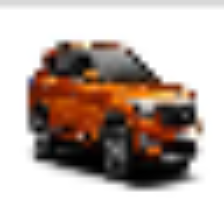

car2.JPG = automobile


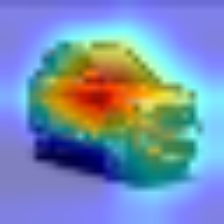

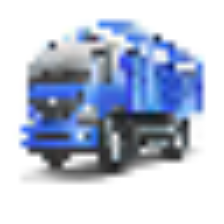

truch1.JPG = truck


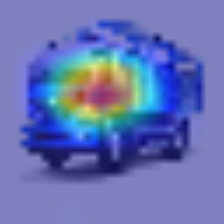

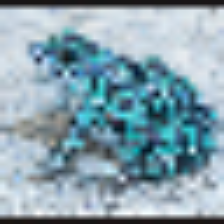

frog2.JPG = frog


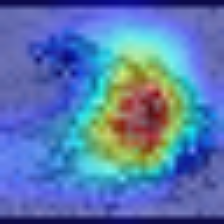

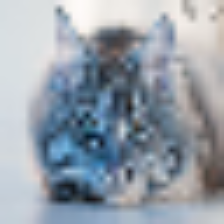

cat1.JPG = cat


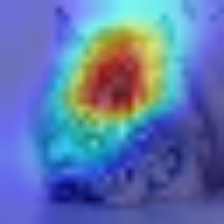

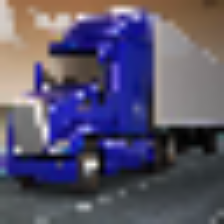

truck3.JPG = truck


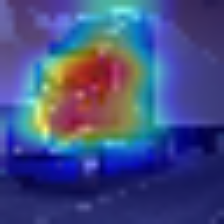

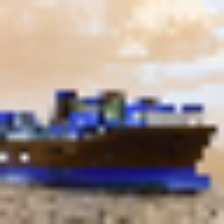

ship.JPG = ship


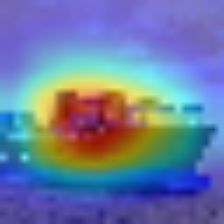

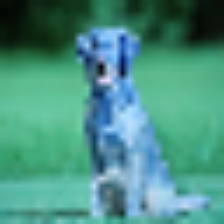

dog2.JPG = dog


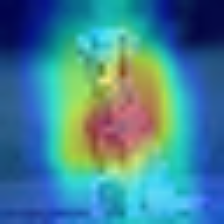

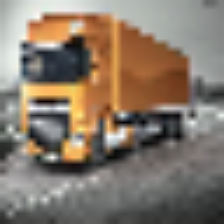

truck2.JPG = truck


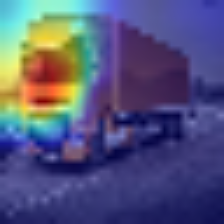

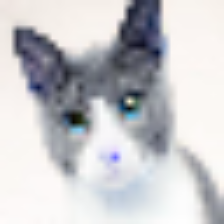

cat2.JPG = cat


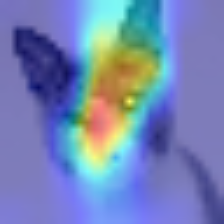

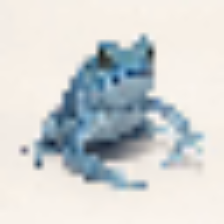

frog1.JPG = frog


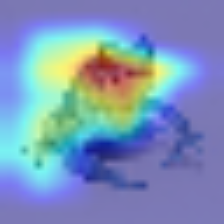

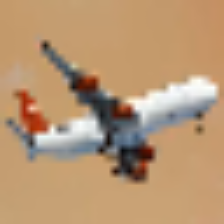

air1.JPG = airplane


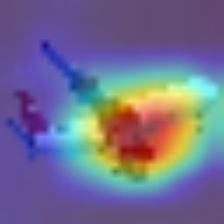

In [21]:
from skimage import io
import os
os.chdir("/content/test_images/")
for file in os.listdir("/content/test_images/"):
    if file.endswith(".JPG"):
        img = io.imread(file)
        img = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
        
        x = image.img_to_array(img)
        # print(x)
        x = x/255.0
        # print(x)
        x = np.expand_dims(x, axis=0)

        # x = preprocess_input(x)

        preds = model.predict(x)
        # print(preds)
        class_idx = np.argmax(preds[0])
        # print(class_idx)
        class_output = model.output[:, class_idx]
        # print(class_output[0:2])
        last_conv_layer = model.get_layer("conv2d_21")


        grads = K.gradients(class_output, last_conv_layer.output)[0]
        # print(grads.shape)
        pooled_grads = K.mean(grads, axis=(0, 1, 2))
        # print(pooled_grads.shape)
        iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

        pooled_grads_value, conv_layer_output_value = iterate([x])

        for i in range(64):
          conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

        heatmap = np.mean(conv_layer_output_value, axis = -1)
        # print(conv_layer_output_value.shape)
        # print(heatmap.shape)
        #print(heatmap)
        heatmap = np.maximum(heatmap, 0)
        #print(heatmap)
        heatmap /= np.max(heatmap)


        heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
        heatmap = np.uint8(255 * heatmap)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
        superimposed_img = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
        from google.colab.patches import cv2_imshow
        cv2_imshow( cv2.resize(img, (224,224)))
        print(file+" = "+labels[np.argmax(preds)])
        cv2_imshow(cv2.resize(superimposed_img, (224,224)))